<a href="https://colab.research.google.com/github/FilippoViola/progettotpifinal/blob/main/Progetto_tpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
response = requests.get('https://raw.githubusercontent.com/FilippoViola/progettotpifinal/refs/heads/main/csvjson%20(6).json')
data=response.json()

In [15]:
numero_cocktails = len(data)
print(f"Numero di cocktail presenti: {numero_cocktails}")
cocktails = input("Inserisci il nome del cocktail che desideri per avere le diverse informazioni: ")
esiste = False
for drink in data:
    if drink["name"] == cocktails:
        esiste = True
        print(f"Dettagli del cocktail '{cocktails}':")
        print(f"Categoria: {drink['category']}")
        print(f"Alcolico: {drink['alcoholic']}")
        print(f"Bicchiere: {drink['glassType']}")
        print(f"Istruzioni: {drink['instructions']}")
        print(f"Ingredienti: {drink['ingredients']}")
        print(f"Dosi: {drink['ingredientMeasures']}")
        break
if not esiste:
    print("Il cocktail non esiste.")



Numero di cocktail presenti: 425
Inserisci il nome del cocktail che desideri per avere le diverse informazioni: Lemon
Il cocktail non esiste.


In [6]:
categorie = set(drink['category'] for drink in data)
print("Categorie disponibili:")
for categoria in categorie:
    print(categoria)
esiste =False
categoria = input("Inserisci la categoria del cocktail: ")
for drink in data:
    if drink['category'] == categoria:
        esiste= True
        print(f"\nCocktail: {drink['name']}")
        print(f"Categoria: {drink['category']}")
        print(f"Alcolico: {drink['alcoholic']}")
        print(f"Bicchiere: {drink['glassType']}")
        print(f"Istruzioni: {drink['instructions']}")
        print(f"Ingredienti: {drink['ingredients']}")
        print(f"Dosi: {drink['ingredientMeasures']}")
if esiste == False:
    print("hai sbagliato a digitare categoria")



Categorie disponibili:
Beer
Shake
Soft Drink
Homemade Liqueur
Cocoa
Other / Unknown
Shot
Punch / Party Drink
Cocktail
Ordinary Drink
Coffee / Tea
Inserisci la categoria del cocktail: Shot

Cocktail: ABC
Categoria: Shot
Alcolico: Alcoholic
Bicchiere: Shot glass
Istruzioni: Layered in a shot glass.
Ingredienti: ['Amaretto', 'Baileys irish cream', 'Cognac']
Dosi: ['1/3 ', '1/3 ', '1/3 ']

Cocktail: ACID
Categoria: Shot
Alcolico: Alcoholic
Bicchiere: Shot glass
Istruzioni: Poor in the 151 first followed by the 101 served with a Coke or Dr Pepper chaser.
Ingredienti: ['151 proof rum', 'Wild Turkey']
Dosi: ['1 oz Bacardi ', '1 oz ']

Cocktail: B-52
Categoria: Shot
Alcolico: Alcoholic
Bicchiere: Shot glass
Istruzioni: Layer ingredients into a shot glass. Serve with a stirrer.
Ingredienti: ['Baileys irish cream', 'Grand Marnier', 'Kahlua']
Dosi: ['1/3 ', '1/3 ', '1/4 ']

Cocktail: B-53
Categoria: Shot
Alcolico: Alcoholic
Bicchiere: Collins Glass
Istruzioni: Layer the Kahlua, Sambucca and Grand

In [7]:
ingredienti_cercati = input("Inserisci gli ingredienti separati da virgola: ").split(",")
ingredienti_cercati = [ingrediente.strip() for ingrediente in ingredienti_cercati]
cocktail_trovato = False
for drink in data:
    ingredients = eval(drink['ingredients'])
    if all(ingrediente in ingredients for ingrediente in ingredienti_cercati):
        cocktail_trovato = True
        print(f"\nCocktail trovato: {drink['name']}")
        print(f"Categoria: {drink['category']}")
        print(f"Alcolico: {drink['alcoholic']}")
        print(f"Bicchiere: {drink['glassType']}")
        print(f"Istruzioni: {drink['instructions']}")
        print(f"Ingredienti: {drink['ingredients']}")
        print(f"dosi: {drink['ingredientMeasures']}")
        break
if not cocktail_trovato:
    print("\nNessun cocktail trovato con gli ingredienti richiesti.")


Inserisci gli ingredienti separati da virgola: Lemon Juice

Cocktail trovato: A1
Categoria: Cocktail
Alcolico: Alcoholic
Bicchiere: Cocktail glass
Istruzioni: Pour all ingredients into a cocktail shaker, mix and serve over ice into a chilled glass.
Ingredienti: ['Gin', 'Grand Marnier', 'Lemon Juice', 'Grenadine']
dosi: ['1 3/4 shot ', '1 Shot ', '1/4 Shot', '1/8 Shot']


In [8]:
import random
print("ecco un coktail casuale da fare")
random_drink = random.choice(data)
print(f"Cocktail casuale: {random_drink['name']}")
print(f"Categoria: {random_drink['category']}")
print(f"Alcolico: {drink['alcoholic']}")
print(f"Bicchiere: {drink['glassType']}")
print(f"Ingredienti: {random_drink['ingredients']}")
print(f"dosi: {random_drink['ingredientMeasures']}")
print(f"Istruzioni: {random_drink['instructions']}")



ecco un coktail casuale da fare
Cocktail casuale: Dirty Martini
Categoria: Cocktail
Alcolico: Alcoholic
Bicchiere: Cocktail glass
Ingredienti: ['Vodka', 'Dry Vermouth', 'Olive Brine', 'Lemon', 'Olive']
dosi: ['70ml/2fl oz', '1 tbsp', '2 tbsp', '1 wedge', '1']
Istruzioni: Pour the vodka, dry vermouth and olive brine into a cocktail shaker with a handful of ice and shake well.
Rub the rim of a martini glass with the wedge of lemon.
Strain the contents of the cocktail shaker into the glass and add the olive.
A dirty Martini contains a splash of olive brine or olive juice and is typically garnished with an olive.


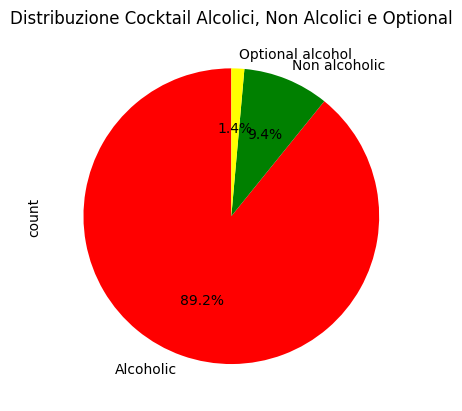

In [20]:
alcolico_counts = pd.Series([drink['alcoholic'] for drink in data]).value_counts()

colors = ['red', 'green', 'yellow']
alcolico_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Distribuzione Cocktail Alcolici, Non Alcolici e Optional")
plt.show()


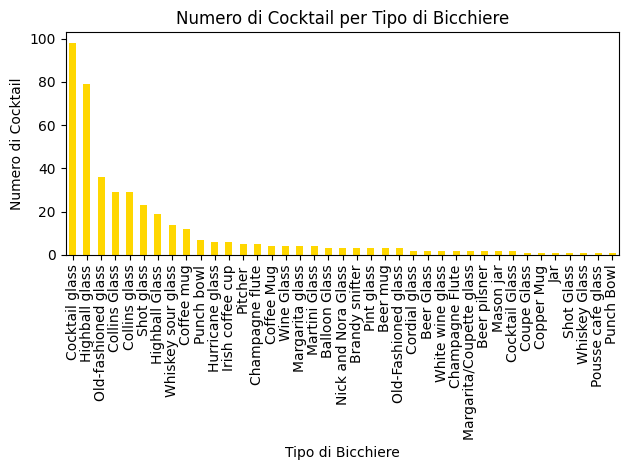

In [16]:
bicchiere_counts = pd.Series([drink['glassType'] for drink in data]).value_counts()
bicchiere_counts.plot(kind='bar', color='gold')
plt.title("Numero di Cocktail per Tipo di Bicchiere")
plt.xlabel("Tipo di Bicchiere")
plt.ylabel("Numero di Cocktail")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


grafico con i 10 ingredienti più usati


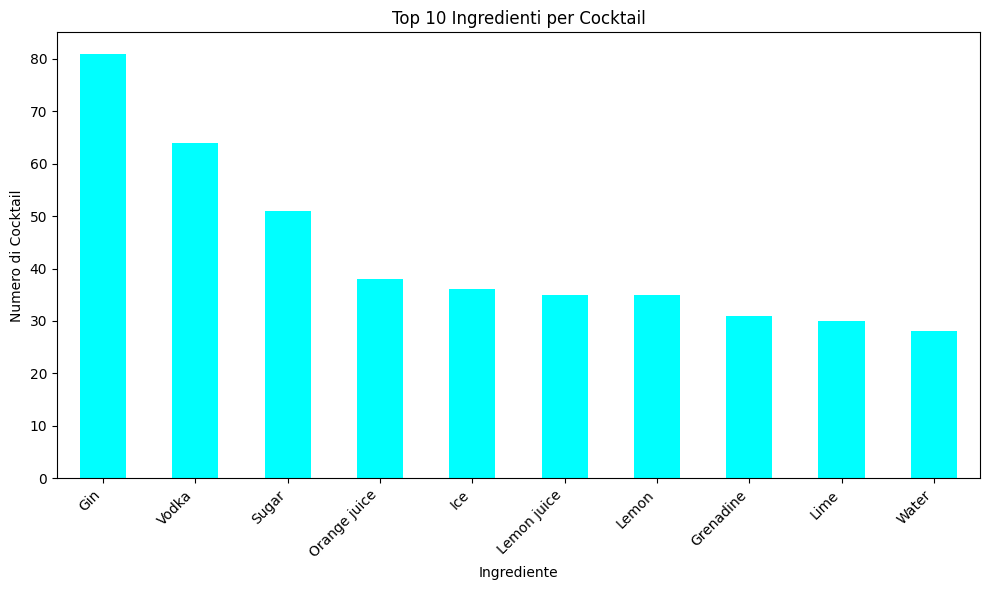

In [19]:
print("grafico con i 10 ingredienti più usati")
ingredienti = [ingredient for drink in data for ingredient in eval(drink['ingredients'])]
ingredienti_counts = pd.Series(ingredienti).value_counts()
top_n = 10
ingredienti_counts = ingredienti_counts.head(top_n)
plt.figure(figsize=(10, 6))
ingredienti_counts.plot(kind='bar', color='aqua')
plt.title(f"Top {top_n} Ingredienti per Cocktail")
plt.xlabel("Ingrediente")
plt.ylabel("Numero di Cocktail")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
